In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/train.csv")

In [3]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Общая информация о датасете

In [4]:
data.shape

(1460, 81)

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
for col in data.columns:
    print(data[col].value_counts())

Id
1       1
2       1
3       1
4       1
5       1
       ..
1456    1
1457    1
1458    1
1459    1
1460    1
Name: count, Length: 1460, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
182.0      1
160.0      1
152.0      1
153.0      1
46.0       1
Name: count, Length: 110, dtype: int64
LotArea
7200     25
9600     24
6000     17
10800    14
8400     14
         ..
10652     1
12968     1
11924     1
14260     1
9550      1
Name: count, Length: 1073, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
I

In [8]:
isna_stat = data.isna().sum()
isna_stat = isna_stat.loc[isna_stat != 0]
isna_stat

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
isna_stat / len(data)

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

Вывод:  
1) В train части датасета 1460 строк и 81 столбец  
2) Среди признаков 43 категориальных (с типом object) и 38 числовых (с типами int64 и float64)
3) В некоторых столбцах есть пропуски. Какие-то столбцы нужно будет полностью выкинуть (т.к. практически весь столбец пустой). Остальные же заполнить средним (для численных признаков) или медианой (для категориальных)

## Анализ целевой переменной (SalePrice)

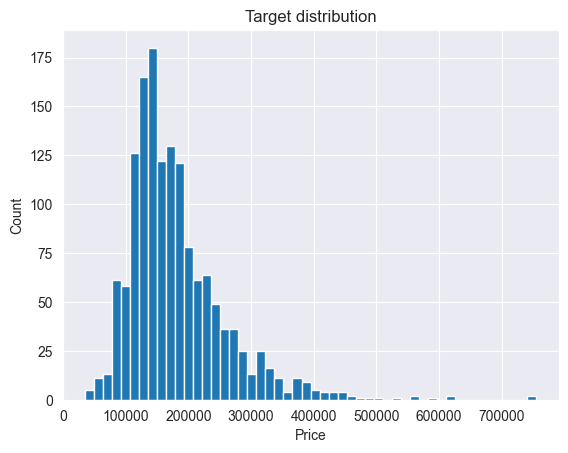

In [10]:
plt.hist(data['SalePrice'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Target distribution')
plt.show()

Видно, что распределение цен на дома асимметрично и соответсвенно сильно отличается от нормального. Попробуем сделать log-преобразование для цен (таргета в задаче) и посмотрим на получившееся распределение

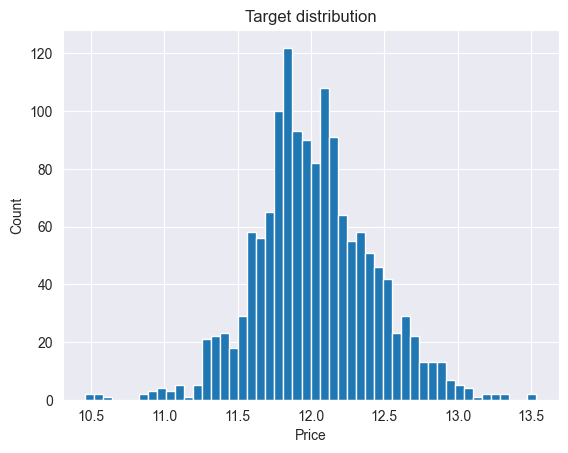

In [11]:
plt.hist(np.log(data['SalePrice']), bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Target distribution')
plt.show()

Теперь распределение больше напоминает нормальное распределение. Поэтому перед тем, как подать данные в модель, нужно будет преобразовать таргет

Посмотрим на возможные выбросы таргета. Для этого построим boxplot для него

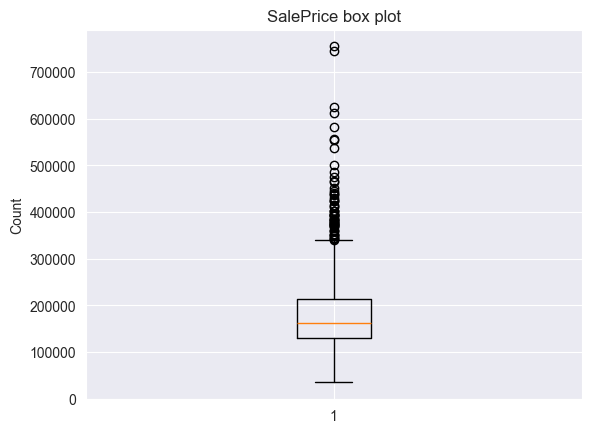

In [12]:
plt.boxplot(data['SalePrice'])
plt.title('SalePrice box plot')
plt.ylabel('Count')
plt.show()

Выбросы есть и их довольно много. Но теперь попробуем применить лог преобразование к таргету

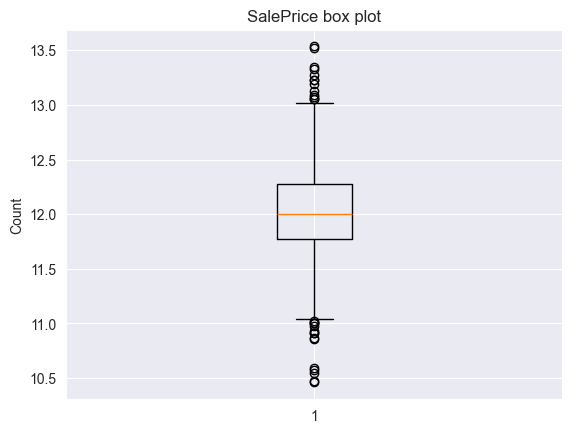

In [13]:
plt.boxplot(np.log(data['SalePrice']))
plt.title('SalePrice box plot')
plt.ylabel('Count')
plt.show()

Теперь выбросы стали ближе к среднему по выборке, а также симметричны относительно него. Поэтому они будут меньше мешать работе модели и можно оставить просто лог-преобразование таргета

## Разделение признаков на категориальные и числовые

In [14]:
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(include=['number']).columns.tolist()

In [15]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [16]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [17]:
num_cols.remove('SalePrice')
num_cols.remove('Id')
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [18]:
print("Num of features: ", len(data.columns))
print("Num of categorical features: ", len(cat_cols))
print("Num of numerical features: ", len(num_cols))

Num of features:  81
Num of categorical features:  43
Num of numerical features:  36


## Обработка пропусков

In [19]:
isna_stat

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Удалим признаки, у которых число пропусков близко к длине датасета 1460 (как неинформативные). Такой признак только один - Alley.  
Для остальных признаков заполним пропуски средним/медианой

In [20]:
cat_cols.remove('Alley')

In [21]:
isna_stat.drop(['Alley'], inplace=True)

In [22]:
data.drop(columns=['Alley'], inplace=True)

In [23]:
for col in isna_stat.index:
    if col in cat_cols:
        data[col] = data[col].fillna(data[col].mode())
    else:
        data[col] = data[col].fillna(data[col].mean())

In [24]:
data.isna().sum().loc[data.isna().sum() != 0]

MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1178
MiscFeature     1405
dtype: int64